In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


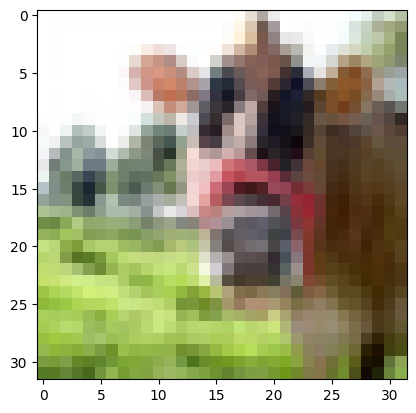

In [23]:
plt.imshow(x_train[0])

In [32]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

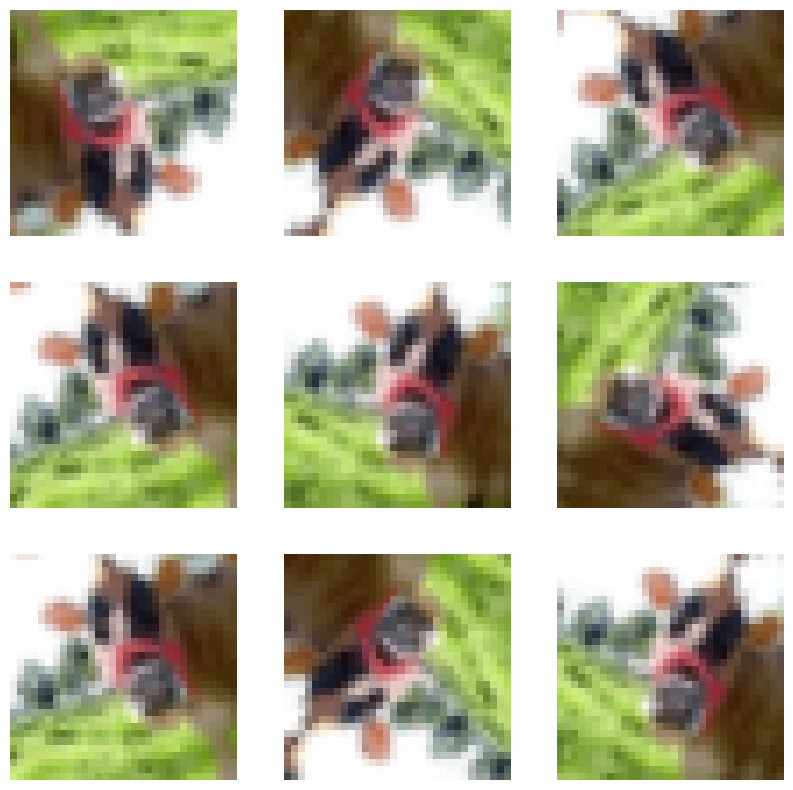

In [36]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  augmented_image = data_augmentation(tf.expand_dims(x_train[0], 0))
  plt.imshow(augmented_image[0])
  plt.axis('off')

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dense

In [46]:
# Define CNN model
cnn_model = Sequential([
    # Input layer
    Input(shape=(32, 32, 3)),

    # Data Augmentation
    data_augmentation,

    # Convolutional Block 1
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.3),

    # Convolutional Block 2
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.4),

    # Convolutional Block 3
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.4),

    # Convolutional Block 4
    Conv2D(512, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    # Global Average Pooling instead of Flatten
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(512, use_bias=False),
    BatchNormalization(),
    LeakyReLU(0.1),
    Dropout(0.5),

    # Output layer (for 100 classes)
    Dense(100, activation='softmax')
])

# Print summary
cnn_model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 32, 32, 64)          │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_48 (LeakyReLU)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 16, 16, 128)         │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_49 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 8, 8, 256)           │         294,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_50 (LeakyReLU)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 4, 4, 512)           │       1,179,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_51 (LeakyReLU)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,869,348 (7.13 MB)

 Trainable params: 1,866,404 (7.12 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [47]:
# Compile the model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [48]:
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 22ms/step - accuracy: 0.0501 - loss: 4.5742 - val_accuracy: 0.0688 - val_loss: 4.7043
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.1176 - loss: 3.7217 - val_accuracy: 0.1409 - val_loss: 3.6474
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.1460 - loss: 3.5458 - val_accuracy: 0.1661 - val_loss: 3.5083
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.1664 - loss: 3.4114 - val_accuracy: 0.1543 - val_loss: 3.6708
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.1822 - loss: 3.3465 - val_accuracy: 0.1460 - val_loss: 3.7993
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.1978 - loss: 3.2474 - val_accuracy: 0.2419 - val_loss: 3.0237
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.2091 - loss: 3.1876 - val_accuracy: 0.1530 - val_loss: 4.0087
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.2173 - loss: 3.1322 - 

In [49]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3929 - loss: 2.4508
Test Accuracy: 0.39


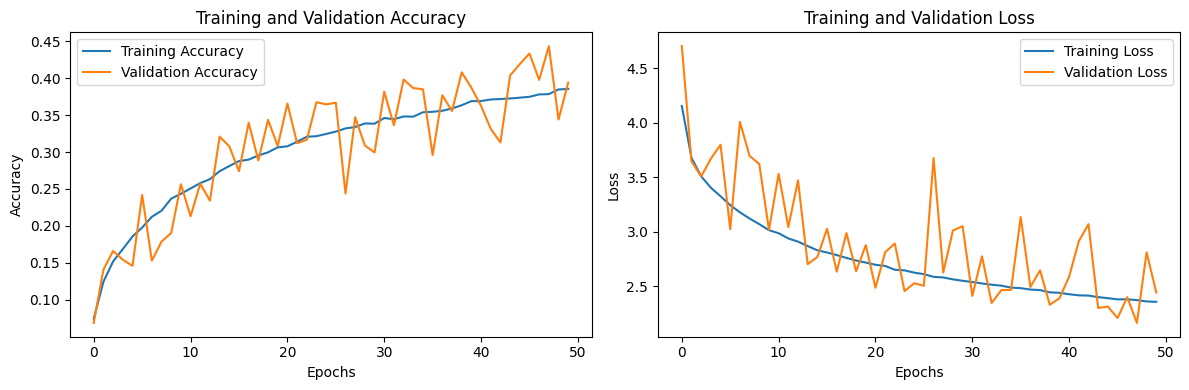

In [50]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()